In [1]:
import os
import numpy as np
import pandas as pd
from nltk import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


In [2]:
FEATURE_NUMBER = 13
PATH_TO_FILE = "/Users/yishaiazabary/PycharmProjects/MigHtyFi/data_2015.csv"


data_frame =  pd.read_csv(PATH_TO_FILE)

# 

In [3]:
df = data_frame.iloc[:,1:]
data =  preprocessing.normalize(df, norm='l1')

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

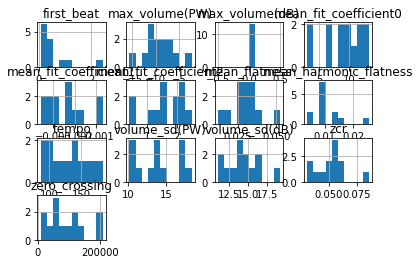

In [47]:
df.hist()

In [48]:
scaler = MinMaxScaler(feature_range=(-1,1))
data = scaler.fit_transform(df)


In [5]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import sklearn.model_selection as model_selection
from sklearn.preprocessing import MinMaxScaler


mn = MinMaxScaler(feature_range=(-1, 1))
res = pd.read_csv("ExtractedData/Unified.csv")
res.fillna(res.median() ,inplace=True)
data = res.iloc[:, 1:-1].values
y = res.iloc[:, -1].values
# x_test = res.iloc[len(res)-1:, :]
# data = pd.DataFrame(data)
# res
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y,
                                                                            test_size=0.1,
                                                                            random_state=42,
                                                                            shuffle=True)
# nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(res)

KeyboardInterrupt: 

In [7]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier(label='')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []

# 
# for name, model in models:
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

In [8]:
# k_near = KNeighborsClassifier()
# results = model_selection.cross_val_score(k_near, X_train, y_train, cv=10, scoring='accuracy', n_splits=5)
# print(results)

In [29]:
dataset = pd.read_csv("ExtractedData/data_no_name.csv")
dataset.fillna(dataset.median() ,inplace=True)
# bins = [0, 100000, 500000,1000000, 100000000, 250000000, 500000000, 1000000000, 10000000000]
# labels = ["{0}-{1}".format(bins[i],bins[i+1]) for i in range(len(bins)-1)]   
X = dataset.iloc[:, 1:-1].values
# y = pd.cut(dataset.iloc[:, 17], bins, labels=labels)
y = dataset.iloc[:, 17]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_train = y_train

In [31]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=20)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

      5092.0       0.00      0.00      0.00       0.0
      5323.0       0.00      0.00      0.00       1.0
    345024.0       0.00      0.00      0.00       0.0
    387726.0       0.00      0.00      0.00       0.0
   1141385.0       0.00      0.00      0.00       1.0
   1725387.0       0.00      0.00      0.00       0.0
   2565505.0       0.00      0.00      0.00       1.0
   3554788.0       0.00      0.00      0.00       1.0
   3770415.0       0.00      0.00      0.00       1.0
   3794801.0       0.00      0.00      0.00       0.0
   4524913.0       0.00      0.00      0.00       0.0
   4624987.0       0.00      0.00      0.00       1.0
   5261303.0       0.00      0.00      0.00       1.0
   6990561.0       0.00      0.00      0.00       0.0
   7534164.0       0.00      0.00      0.00       1.0
  10289719.0   

/Users/yishaiazabary/venv/MigHtyFi/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yishaiazabary/venv/MigHtyFi/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
